In [1]:
!pip install seaborn==0.9.0

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Consumo_cerveja.csv", sep=";")
data.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
data.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.0+ KB


In [6]:
data = data.round(2)
data.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [7]:
data.corr()

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [0]:
import seaborn as sb

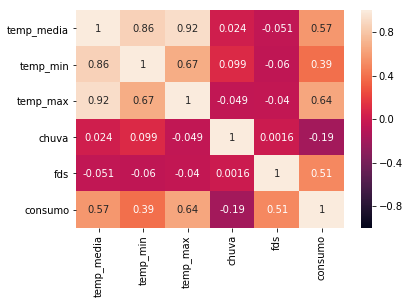

In [9]:
cor = data.corr()
sb.heatmap(cor, vmin=-1, vmax=1, annot=True)

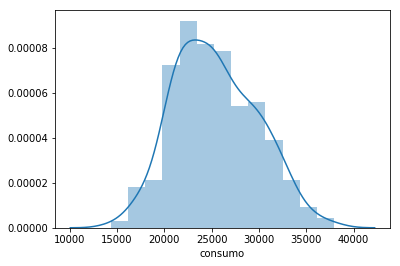

In [10]:
ax = sb.distplot(data['consumo'])

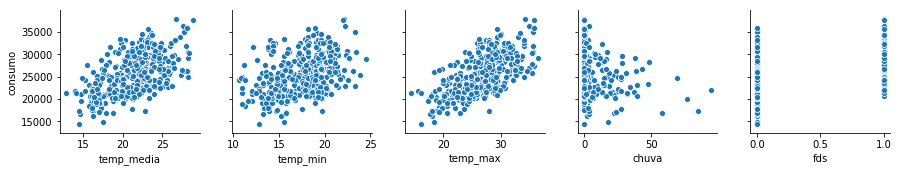

In [11]:
sb.pairplot(data=data, y_vars='consumo', x_vars=['temp_media','temp_min','temp_max','chuva','fds'])

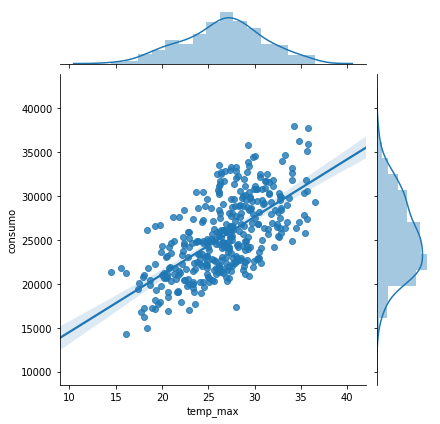

In [12]:
sb.jointplot(data=data, x="temp_max", y="consumo", kind='reg')

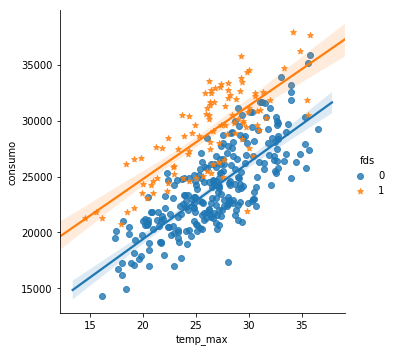

In [13]:
sb.lmplot(data=data, x="temp_max", y="consumo", hue='fds', markers=['o','*'])

In [0]:
from sklearn.model_selection import train_test_split

x=data[['temp_media','temp_max','temp_min','chuva','fds']]
y=data['consumo']


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

In [0]:
modelo = LinearRegression()

In [37]:
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
#R2 aqui e' um dado simplificado que diz numa escala entre 0 e 1 o quanto nossa reta se ajusta aos dados
print(modelo.score(x_train, y_train))

0.7160304730146454


In [0]:
ponto = x_test[0:1]

In [40]:
modelo.predict(ponto)[0].round(2)

26629.38

In [41]:
modelo.intercept_
#representa qual será o valor de Y caso X1, X2 ... Xn tenham valores nulos

5922.074332416465

In [42]:
modelo.coef_
# aqui sao os coeficientes de variacao, ou seja, o quanto cada variavel influencia na inclinacao da reta

array([ 251.41454668,  551.4677439 ,  -99.53659934,  -56.75097431,
       5236.29066354])

In [0]:
y_previsto_train = modelo.predict(x_train)

In [0]:
residuo = y_train - y_previsto_train

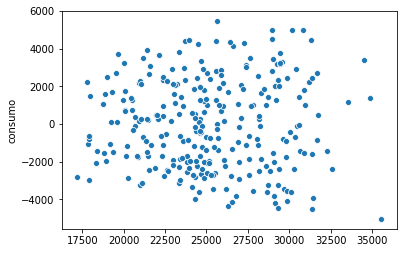

In [26]:
sb.scatterplot(x=y_previsto_train, y=residuo)

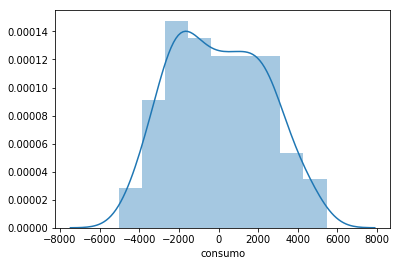

In [27]:
sb.distplot(residuo)

In [0]:
import sklearn.metrics

In [0]:
EQM = sklearn.metrics.mean_squared_error(y_test, modelo.predict(x_test))

In [30]:
print(EQM)

4966347.703616782


In [31]:
np.sqrt(EQM).round(2)

2228.53

In [0]:
import pickle

In [0]:
output = open('modelo_consumo_cerveja','wb') #write binary
pickle.dump(modelo, output)
output.close() #vai salvar na pasta do proprio notebook